# Import data

In [1]:
import warnings
warnings.filterwarnings("ignore")

import time
from time import process_time 

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, roc_curve  

import pickle

In [2]:
df = pd.read_csv(r"C:\Users\online\Downloads\churn_detection\data.csv")

# EDA 

In [3]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 12)

In [5]:
df.size

120000

In [6]:
df.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
customer_id         10000 non-null int64
credit_score        10000 non-null int64
country             10000 non-null object
gender              10000 non-null object
age                 10000 non-null int64
tenure              10000 non-null int64
balance             10000 non-null float64
products_number     10000 non-null int64
credit_card         10000 non-null int64
active_member       10000 non-null int64
estimated_salary    10000 non-null float64
churn               10000 non-null int64
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [8]:
df.describe(include='all')

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.569094e+07,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [9]:
df.isnull().sum().sum()

0

In [10]:
df.churn.value_counts()

0    7963
1    2037
Name: churn, dtype: int64

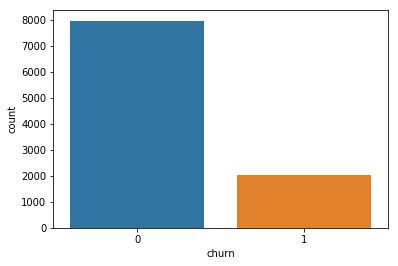

In [11]:
sns.countplot(df['churn'], data=df)

# Feature Engineering

In [12]:
df = df.drop(['customer_id'], axis=1)
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
df.country.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [14]:
label_encoder_country = LabelEncoder()
label_encoder_gender = LabelEncoder()

df['country'] = label_encoder_country.fit_transform(df['country'])
df['gender'] = label_encoder_gender.fit_transform(df['gender'])

In [15]:
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [16]:
df_maj = df[df.churn==0]
df_min = df[df.churn==1]

df_min_upsampled = resample(df_min, replace=True, n_samples=len(df_maj), random_state=42)

df_sampled = pd.concat([df_maj, df_min_upsampled])

df_sampled.churn.value_counts()

1    7963
0    7963
Name: churn, dtype: int64

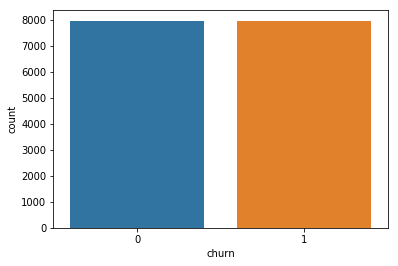

In [17]:
sns.countplot(df_sampled['churn'], data=df_sampled)

In [18]:
df_sampled.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
6,822,0,1,50,7,0.00,2,1,1,10062.80,0
8,501,0,1,44,4,142051.07,2,0,1,74940.50,0


# Splitting and Scaling

In [19]:
X = df_sampled.drop('churn', axis=1)
y = df_sampled['churn'].values

In [20]:
X.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
1,608,2,0,41,1,83807.86,1,0,1,112542.58
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10
6,822,0,1,50,7,0.00,2,1,1,10062.80
8,501,0,1,44,4,142051.07,2,0,1,74940.50


In [21]:
X.active_member.unique()

array([1, 0], dtype=int64)

In [22]:
y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y, random_state = 42)

In [24]:
X_train.shape

(11148, 10)

In [25]:
X_test.shape

(4778, 10)

# 4. Modeling 

### Logistic Regression

In [26]:
LOG = LogisticRegression()

LOG.fit(X_train, y_train)

LOG_pred = LOG.predict(X_test)

In [27]:
print("The accuracy score is =", accuracy_score(y_test, LOG_pred))
print('F1 Score = ', f1_score(y_test, LOG_pred))

The accuracy score is = 0.6864796986186689
F1 Score =  0.6935351882160393


In [28]:
LOG_cf_matrix = confusion_matrix(y_test, LOG_pred)
LOG_cf_matrix

array([[1585,  804],
       [ 694, 1695]], dtype=int64)

In [29]:
print(classification_report(y_test, LOG_pred))

             precision    recall  f1-score   support

          0       0.70      0.66      0.68      2389
          1       0.68      0.71      0.69      2389

avg / total       0.69      0.69      0.69      4778



### Random Forest

In [30]:
RFC = RandomForestClassifier(random_state=42)

RFC.fit(X_train, y_train)

RFC_pred = RFC.predict(X_test)

In [31]:
print("The accuracy score is =", accuracy_score(y_test, RFC_pred))
print('F1 Score = ', f1_score(y_test, RFC_pred))

The accuracy score is = 0.9434910004185851
F1 Score =  0.945410432672867


In [32]:
RFC_cf_matrix = confusion_matrix(y_test, RFC_pred)
RFC_cf_matrix

array([[2170,  219],
       [  51, 2338]], dtype=int64)

In [33]:
print(classification_report(y_test, RFC_pred))

             precision    recall  f1-score   support

          0       0.98      0.91      0.94      2389
          1       0.91      0.98      0.95      2389

avg / total       0.95      0.94      0.94      4778



In [34]:
def plot_roc_curve(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

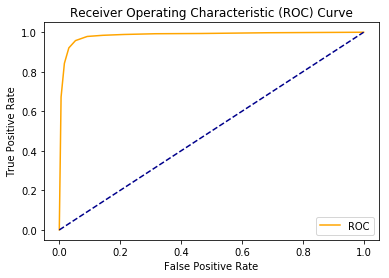

In [35]:
probs = RFC.predict_proba(X_test)  
probs = probs[:, 1]  
fper, tper, thresholds = roc_curve(y_test, probs) 
plot_roc_curve(fper, tper)

In [36]:
pickle.dump((RFC), open('model.pkl','wb'))
model = pickle.load(open('model.pkl','rb'))